## Introduction

This is a kernel with starter code demonstrating how to read in the data and begin exploring. Click the blue "Edit Notebook" or "Fork Notebook" button at the top of this kernel to begin editing.

## Exploratory Analysis

To begin this exploratory analysis, first use `matplotlib` to import libraries and define functions for plotting the data. Depending on the data, not all plots will be made. (Hey, I'm just a kerneling bot, not a Kaggle Competitions Grandmaster!)

In [2]:
!pip install matplotlib numpy pandas scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

Check the data in the 2 created datasets (2019newBig.csv: 12M rows, 2019new.csv: 1.2M rows)

(1195807, 18)
0   2019-01-13 19:18:36
1   2019-01-04 07:45:08
2   2019-01-05 18:27:40
3   2019-01-18 13:05:48
4   2019-01-16 21:34:51
Name: tpep_pickup_datetime, dtype: datetime64[ns]
0    2019-01-13
1    2019-01-04
2    2019-01-05
3    2019-01-18
4    2019-01-16
Name: pickup_date, dtype: object
0    19
1     7
2    18
3    13
4    21
Name: pickup_hour, dtype: int32


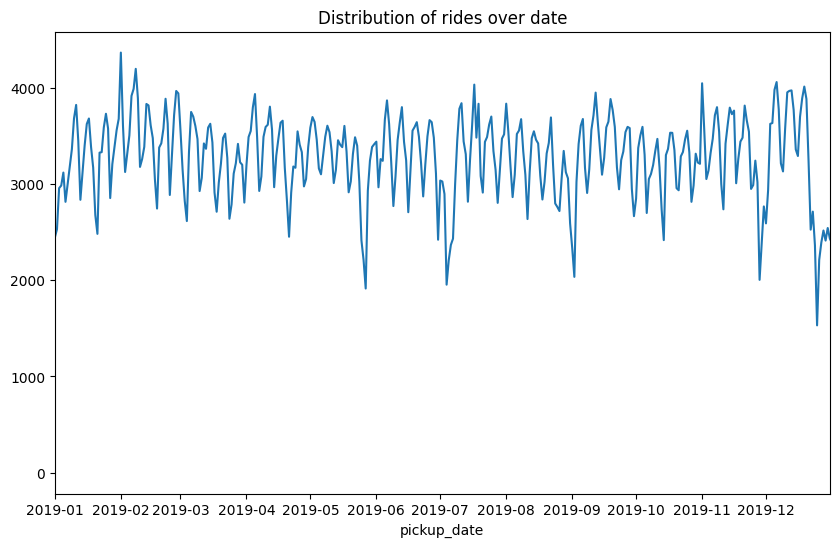

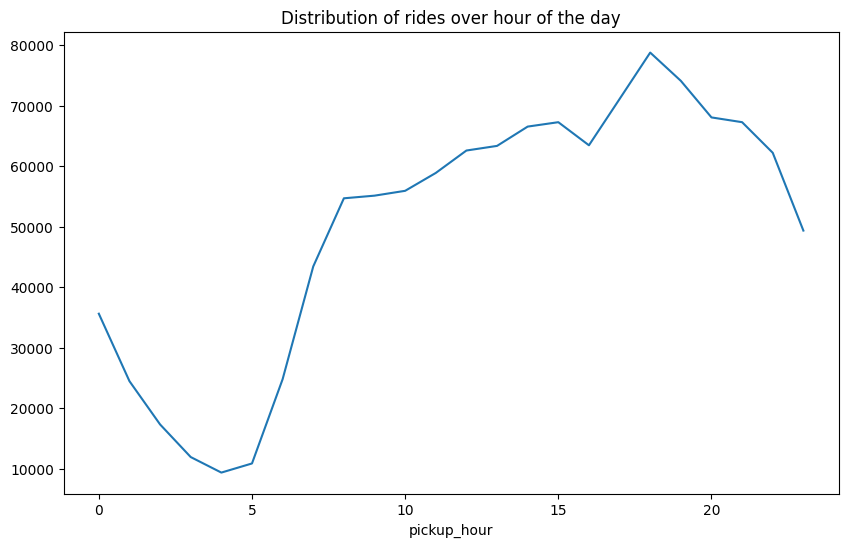

In [5]:
dataset ='Datasets/2019new.csv'

if os.path.exists(dataset):
    df = pd.read_csv(dataset)
    #if Nan in congestino_surcharge, set it to 0
    df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)
    df=df.dropna()
    #drop if distance is 0 and fare <=0
    df = df.drop(df[(df['trip_distance'] == 0) & (df['fare_amount'] <= 0)].index)
    print(df.shape)
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    print(df['tpep_pickup_datetime'].head())
    df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
    df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
    df['pickup_minute'] = df['tpep_pickup_datetime'].dt.minute + df['pickup_hour']*60
    df=df.drop(['tpep_pickup_datetime'], axis=1)
    df = df.drop(['tpep_dropoff_datetime'], axis=1)    
    #df=df.drop(['pickup_hour'], axis=1)
    
    print(df['pickup_date'].head())
    print(df['pickup_hour'].head())
    plt.figure(figsize=(10, 6))
    #plot in 2019 year
    df['pickup_date'].value_counts().sort_index().plot().set_xlim(pd.Timestamp('2019-01-01'), pd.Timestamp('2019-12-31'))
    plt.title('Distribution of rides over date')
    plt.show()
    plt.figure(figsize=(10, 6))
    df['pickup_hour'].value_counts().sort_index().plot()
    plt.title('Distribution of rides over hour of the day')
    plt.show()
else:
    print("Dataset not found")

In [6]:
weather = pd.read_csv('Datasets/weather.csv')

weather=weather.drop(columns=['tmax','tmin','departure','HDD','CDD'])
weather['date'] = pd.to_datetime(weather['date'])

holidays = pd.read_csv('Datasets/USHoliday.csv')

#maintain only if holiday is in 2019
holidays['Date'] = pd.to_datetime(holidays['Date'])
holidays=holidays[holidays['Date'].dt.year==2019]

/var/folders/n3/qm98005j2xn6lkrp94fvvbzm0000gn/T/ipykernel_69037/1092960794.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather['date'] = pd.to_datetime(weather['date'])


In [ ]:
# Ensure the pickup_date column is in datetime64[ns] format
df['pickup_date'] = pd.to_datetime(df['pickup_date'])

new_df = pd.merge(df, weather, how='left', left_on='pickup_date', right_on='date')

new_df = new_df.drop(['date'], axis=1)
#add column 1 if week day, 2 if weekend, 3 if holiday
new_df['holiday'] = new_df['pickup_date'].isin(holidays['Date']).astype(int)
new_df['day_of_week'] = new_df['pickup_date'].dt.dayofweek
new_df['day_type'] = np.where(new_df['day_of_week'] < 5, 1, 2)
new_df.loc[new_df['holiday'] == 1, 'day_type'] = 3
new_df = new_df.drop(['pickup_date'], axis=1)
new_df = new_df.drop(['day_of_week'], axis=1)
new_df = new_df.drop(['holiday'], axis=1)

#set precipitation to 0 if NaN and integer, new_snow, snow_depth
new_df['precipitation'] = new_df['precipitation'].replace(to_replace="T", value=0)
new_df['new_snow'] = new_df['new_snow'].replace(to_replace="T", value=0)
new_df['snow_depth'] = new_df['snow_depth'].replace(to_replace="T", value=0)
#set to float
new_df['precipitation'] = new_df['precipitation'].astype(float)
new_df['new_snow'] = new_df['new_snow'].astype(float)
new_df['snow_depth'] = new_df['snow_depth'].astype(float)
new_df['store_and_fwd_flag'] = new_df['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

new_df = new_df.dropna()
print(new_df.head(1).to_string())
print(new_df.shape)


   vendorid  passenger_count  trip_distance  ratecodeid  store_and_fwd_flag  pulocationid  dolocationid  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  pickup_hour  pickup_minute  tavg  precipitation  new_snow  snow_depth  day_type
0       2.0              2.0           6.69         1.0                   0         186.0          49.0           2.0         26.5    0.0      0.5         0.0           0.0                    0.3          27.3                   0.0           19           1158  29.0            0.0       0.0         0.0         2
(1195791, 23)
